In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

In [2]:
import os
os.chdir("../src/")
import maddlib  # maddlib.py
from maddlib import optimal_bandwidth  # optimal_bandwidth.py
os.chdir("../test/")

In [3]:
# Load train and test sets
X_train = pd.read_csv("./data/X_train.csv")
X_test = pd.read_csv("./data/X_test.csv")
y_train = pd.read_csv("./data/y_train.csv")
y_test = pd.read_csv("./data/y_test.csv")

In [4]:
X_test.head(5)

,gender,highest_education,poverty,age,disability,num_of_prev_attempts,studied_credits,sum_click
0,1.0,0.50,0.0,0.5,0.0,0.000000,0.05,0.152374
1,1.0,0.25,0.0,0.0,0.0,0.166667,0.10,0.058953
2,1.0,0.25,1.0,0.0,0.0,0.166667,0.10,0.027011
3,1.0,0.75,0.0,0.5,0.0,0.000000,0.05,0.218535
4,1.0,0.50,1.0,0.0,0.0,0.000000,0.05,0.070843


In [5]:
len(y_test)

1422

In [6]:
# Training phase: Fit a classifier
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train.values.ravel())

LogisticRegression(random_state=0)

In [7]:
# Testing phase: Get the predicted probabilities of positive predictions
y_pp = clf.predict_proba(X_test)[:, 1] 

In [8]:
# Choose the sensitive feature (or could be two distinct groups also)
sensitive_feature = "disability"

In [9]:
# Generate multiple values of h
h = optimal_bandwidth.generate_bandwidths(500)

In [10]:
# Compute the MAADs according to the h
madd = [maddlib.MADD(hi, X_test, y_pp, sensitive_feature) for hi in h]

In [11]:
# Search for the optimal bandwidth interval
interval = optimal_bandwidth.find_stable_interval(h, madd, min_nb_points=10)
interval

{'min interval length': 0.05,
 'indexes': (472, 487),
 'h interval': '[0.037, 0.091]',
 'min madd std': 0.038170420392280184,
 'madd average': 0.32648835838491014}

In [12]:
n0 = len(X_test[X_test[sensitive_feature] == 0])
n1 = len(X_test[X_test[sensitive_feature] == 1])

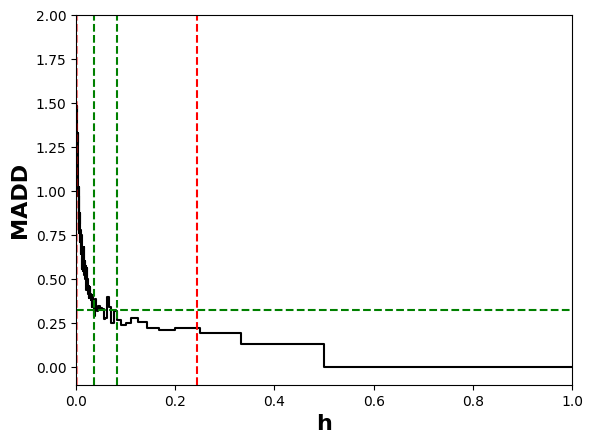

In [13]:
optimal_bandwidth.plot_stable_interval(h, madd, indexes=interval["indexes"], n0=n0, n1=n1,
                        legend=False, show_order=True)

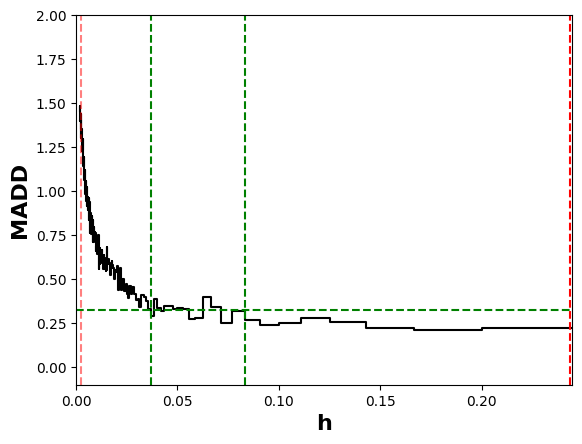

In [14]:
optimal_bandwidth.plot_stable_interval(h, madd, indexes=interval["indexes"], n0=n0, n1=n1,
                        zoom="sup order", legend=False, show_order=True)

In [19]:
maddlib.MADD("auto", X_test, y_pp, sensitive_feature, min_nb_points=10)

0.32648835838491014